In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# --- Load Pokémon dataset ---
url = "/Users/animeshdash/pokedex.csv"
df = pd.read_csv(url)

In [3]:
# --- Select relevant numeric features ---
features = ["attack", "defense", "speed"]
data = df[features].dropna().values
data


array([[ 49,  49,  45],
       [ 62,  63,  60],
       [100, 123,  80],
       ...,
       [101,  53,  43],
       [107, 101,  79],
       [ 95, 115,  65]], shape=(801, 3))

In [4]:
# --- Standardize features ---
X = StandardScaler().fit_transform(data)
X

array([[-0.89790944, -0.78077335, -0.73848628],
       [-0.49341318, -0.32548801, -0.2192685 ],
       [ 0.6889605 ,  1.62573488,  0.47302188],
       ...,
       [ 0.72007559, -0.65069183, -0.80771532],
       [ 0.90676617,  0.91028648,  0.43840736],
       [ 0.53338501,  1.36557183, -0.04619591]], shape=(801, 3))

In [5]:
# --- Euclidean distance function ---
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

In [6]:
# --- Get neighbors within eps ---
def region_query(X, point_idx, eps):
    neighbors = []
    for i in range(len(X)):
        if euclidean(X[point_idx], X[i]) <= eps:
            neighbors.append(i)
    return neighbors

In [7]:
# --- Expand cluster iteratively ---
def expand_cluster(X, labels, point_idx, cluster_id, eps, minPts):
    neighbors = region_query(X, point_idx, eps)
    if len(neighbors) < minPts:
        labels[point_idx] = -1  # mark as noise
        return False
    else:
        labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            n = neighbors[i]
            if labels[n] == -1:
                labels[n] = cluster_id
            elif labels[n] == 0:
                labels[n] = cluster_id
                n_neighbors = region_query(X, n, eps)
                if len(n_neighbors) >= minPts:
                    neighbors += n_neighbors
            i += 1
        return True

In [8]:
# --- DBSCAN main ---
def dbscan(X, eps, minPts):
    labels = np.zeros(len(X), dtype=int)
    cluster_id = 0
    for i in range(len(X)):
        if labels[i] != 0:
            continue
        if expand_cluster(X, labels, i, cluster_id + 1, eps, minPts):
            cluster_id += 1
    return labels

In [9]:
# --- Run DBSCAN ---
eps = 0.4
minPts = 5
labels = dbscan(X, eps, minPts)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {np.sum(labels == -1)}")

Number of clusters: 4
Number of noise points: 148


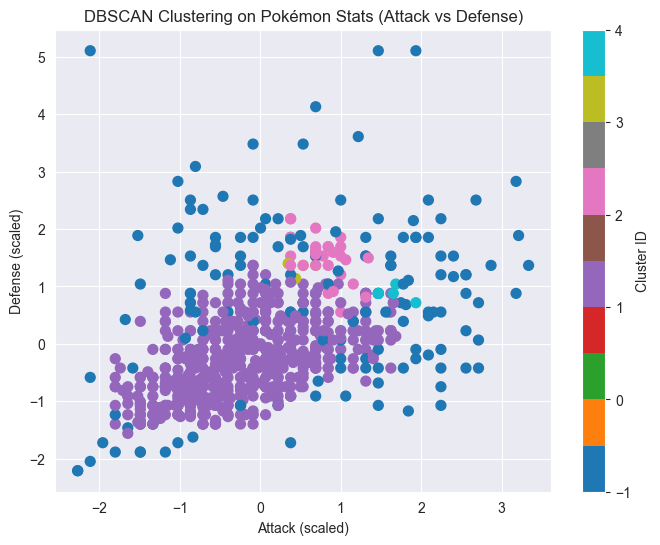

In [10]:
# --- Visualization ---
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=50)
plt.title("DBSCAN Clustering on Pokémon Stats (Attack vs Defense)")
plt.xlabel("Attack (scaled)")
plt.ylabel("Defense (scaled)")
plt.colorbar(label="Cluster ID")
plt.show()
